# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [165]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Today's date
today = date.today()

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# url = "https://api.openweathermap.org/"
# url = "http://api.openweathermap.org/data/2.5/weather?"
url = "http://api.openweathermap.org/data/2.5/weather?"
# query_url = f"{url}appid={api_key}"

# Get weather data
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()
# weather_json



## Generate Cities List

In [115]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [157]:
names = []
temps = []
winds = []
humids = []
clouds = []
lat = []

for city in cities: #cities.head():
    # Add + 1 because index starts at 0
    city_number = (cities.index(city)) + 1
    #city = city.capitalize()
    print("---------------------")
    print(f"Processing city #{city_number}: {city.capitalize()}")
    adjusted_city = city.replace(" ", "%20")
    query_url = f"{url}appid={api_key}&units=imperial&q={adjusted_city}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    #names.append(weather_json['name'])
    try:
        print(f"url: {query_url}")
        temps.append(weather_json['main']['temp_max'])
        names.append(weather_json['name'])
        winds.append(weather_json['wind']['speed'])
        humids.append(weather_json['main']['humidity'])
        clouds.append(weather_json['clouds']['all'])
        lat.append(weather_json['coord']['lat'])
    except KeyError:
        print(f"{city.capitalize()} doesn't exist at OpenWeather API")
    

    print(f"Finished processing {city.capitalize()}")
    time.sleep(1)


---------------------
Processing city #1: Siguiri
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=siguiri
Finished processing Siguiri
---------------------
Processing city #2: Bluff
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=bluff
Finished processing Bluff
---------------------
Processing city #3: Tual
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=tual
Finished processing Tual
---------------------
Processing city #4: Lebu
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=lebu
Finished processing Lebu
---------------------
Processing city #5: Punta arenas
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=punta%20arenas
Finished processing Punta arenas
---------------------
Processing city

---------------------
Processing city #41: Matagami
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=matagami
Finished processing Matagami
---------------------
Processing city #42: Hermanus
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=hermanus
Finished processing Hermanus
---------------------
Processing city #43: El dorado
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=el%20dorado
Finished processing El dorado
---------------------
Processing city #44: Barrow
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=barrow
Finished processing Barrow
---------------------
Processing city #45: Atuona
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=atuona
Finished processing Atuona
-----------------

---------------------
Processing city #82: Saint-augustin
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=saint-augustin
Finished processing Saint-augustin
---------------------
Processing city #83: Cabo san lucas
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=cabo%20san%20lucas
Finished processing Cabo san lucas
---------------------
Processing city #84: Lorengau
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=lorengau
Finished processing Lorengau
---------------------
Processing city #85: Scottsburgh
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=scottsburgh
Scottsburgh doesn't exist at OpenWeather API
Finished processing Scottsburgh
---------------------
Processing city #86: Vardo
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a

---------------------
Processing city #122: Grand gaube
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=grand%20gaube
Finished processing Grand gaube
---------------------
Processing city #123: Bahadurganj
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=bahadurganj
Finished processing Bahadurganj
---------------------
Processing city #124: Batagay
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=batagay
Finished processing Batagay
---------------------
Processing city #125: Seoul
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=seoul
Finished processing Seoul
---------------------
Processing city #126: Yelizovo
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=yelizovo
Finished processing Yelizo

---------------------
Processing city #164: Asau
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=asau
Asau doesn't exist at OpenWeather API
Finished processing Asau
---------------------
Processing city #165: Bowen
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=bowen
Finished processing Bowen
---------------------
Processing city #166: Ribeira grande
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=ribeira%20grande
Finished processing Ribeira grande
---------------------
Processing city #167: Malanje
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=malanje
Finished processing Malanje
---------------------
Processing city #168: Tallahassee
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=tallah

---------------------
Processing city #204: Sandwick
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=sandwick
Finished processing Sandwick
---------------------
Processing city #205: Junnar
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=junnar
Finished processing Junnar
---------------------
Processing city #206: Lucea
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=lucea
Finished processing Lucea
---------------------
Processing city #207: Ucluelet
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=ucluelet
Finished processing Ucluelet
---------------------
Processing city #208: Fortuna
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=fortuna
Finished processing Fortuna
---------------------
P

---------------------
Processing city #245: Jiroft
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=jiroft
Jiroft doesn't exist at OpenWeather API
Finished processing Jiroft
---------------------
Processing city #246: Algeciras
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=algeciras
Finished processing Algeciras
---------------------
Processing city #247: Chapais
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=chapais
Finished processing Chapais
---------------------
Processing city #248: Marzuq
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=marzuq
Finished processing Marzuq
---------------------
Processing city #249: Baiculesti
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=baiculesti
Fi

---------------------
Processing city #286: Hamburg
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=hamburg
Finished processing Hamburg
---------------------
Processing city #287: Two rivers
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=two%20rivers
Finished processing Two rivers
---------------------
Processing city #288: Cottonwood
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=cottonwood
Finished processing Cottonwood
---------------------
Processing city #289: Praia da vitoria
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=praia%20da%20vitoria
Finished processing Praia da vitoria
---------------------
Processing city #290: Belmonte
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=belm

---------------------
Processing city #326: Fairbanks
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=fairbanks
Finished processing Fairbanks
---------------------
Processing city #327: Dzilam gonzalez
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=dzilam%20gonzalez
Finished processing Dzilam gonzalez
---------------------
Processing city #328: Saleaula
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=saleaula
Saleaula doesn't exist at OpenWeather API
Finished processing Saleaula
---------------------
Processing city #329: Macusani
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=macusani
Finished processing Macusani
---------------------
Processing city #330: Abu jubayhah
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06

---------------------
Processing city #366: Margate
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=margate
Finished processing Margate
---------------------
Processing city #367: Darhan
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=darhan
Finished processing Darhan
---------------------
Processing city #368: Comodoro rivadavia
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=comodoro%20rivadavia
Finished processing Comodoro rivadavia
---------------------
Processing city #369: Gravdal
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=gravdal
Finished processing Gravdal
---------------------
Processing city #370: Loandjili
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=loandjili
Finished pro

---------------------
Processing city #407: Dien bien
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=dien%20bien
Dien bien doesn't exist at OpenWeather API
Finished processing Dien bien
---------------------
Processing city #408: Olafsvik
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=olafsvik
Olafsvik doesn't exist at OpenWeather API
Finished processing Olafsvik
---------------------
Processing city #409: Watertown
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=watertown
Finished processing Watertown
---------------------
Processing city #410: Roald
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=roald
Finished processing Roald
---------------------
Processing city #411: Menongue
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24

---------------------
Processing city #446: Garowe
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=garowe
Finished processing Garowe
---------------------
Processing city #447: Singaparna
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=singaparna
Finished processing Singaparna
---------------------
Processing city #448: Vilhena
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=vilhena
Finished processing Vilhena
---------------------
Processing city #449: Tanda
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=tanda
Finished processing Tanda
---------------------
Processing city #450: Almaty
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=almaty
Finished processing Almaty
---------------------
P

---------------------
Processing city #486: Middle island
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=middle%20island
Finished processing Middle island
---------------------
Processing city #487: Nabire
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=nabire
Finished processing Nabire
---------------------
Processing city #488: Omboue
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=omboue
Finished processing Omboue
---------------------
Processing city #489: Samarai
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=samarai
Finished processing Samarai
---------------------
Processing city #490: Dekar
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=dekar
Finished processing Dekar
------------

---------------------
Processing city #527: Sangar
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=sangar
Finished processing Sangar
---------------------
Processing city #528: Walvis bay
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=walvis%20bay
Finished processing Walvis bay
---------------------
Processing city #529: Chicama
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=chicama
Finished processing Chicama
---------------------
Processing city #530: Ilheus
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=ilheus
Finished processing Ilheus
---------------------
Processing city #531: Torit
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=torit
Torit doesn't exist at OpenWeather API
Finished

---------------------
Processing city #567: High level
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=high%20level
Finished processing High level
---------------------
Processing city #568: Plettenberg bay
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=plettenberg%20bay
Finished processing Plettenberg bay
---------------------
Processing city #569: Thinadhoo
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=thinadhoo
Finished processing Thinadhoo
---------------------
Processing city #570: Podporozhye
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=podporozhye
Finished processing Podporozhye
---------------------
Processing city #571: Port-gentil
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial

---------------------
Processing city #607: Tanabe
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=tanabe
Finished processing Tanabe
---------------------
Processing city #608: Nurota
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=nurota
Finished processing Nurota
---------------------
Processing city #609: Upington
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=upington
Finished processing Upington
---------------------
Processing city #610: Maceio
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=maceio
Finished processing Maceio
---------------------
Processing city #611: North bend
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=north%20bend
Finished processing North bend
---------------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [158]:
lat

[11.42,
 -23.58,
 -5.67,
 8.96,
 -53.16,
 19.71,
 28.66,
 4.94,
 -42.88,
 -32.25,
 -33.21,
 -26.65,
 18.42,
 69.49,
 -10.16,
 -20.74,
 -54.81,
 -20.63,
 78.22,
 22.08,
 72.79,
 50.68,
 -7.95,
 -3.54,
 33.93,
 46.45,
 -23.12,
 -3.48,
 -30.97,
 39.95,
 13.22,
 27.97,
 -33.64,
 54.43,
 -46.43,
 9.67,
 -34.42,
 10.65,
 -38.31,
 -9.8,
 60.79,
 -46.19,
 26.54,
 44.17,
 -42.48,
 -0.74,
 5.28,
 42.65,
 -19.99,
 44.82,
 -33.86,
 -13.97,
 -33.02,
 55.28,
 30.04,
 15.34,
 40.8,
 35.43,
 67.56,
 -19.55,
 54.43,
 -33.93,
 49.72,
 69.22,
 63.75,
 -24.52,
 69.7,
 77.48,
 35.09,
 14.69,
 20.52,
 50.56,
 45.63,
 22.89,
 -2.02,
 39.62,
 -3.31,
 69.3,
 15.86,
 3.07,
 20.93,
 -2.57,
 -34.58,
 -1.4,
 69.44,
 27.53,
 70.05,
 41.53,
 33.53,
 -7.85,
 50.46,
 48.99,
 29.03,
 -30.4,
 -20.34,
 13.3,
 71.98,
 16.78,
 47.66,
 17.89,
 6.8,
 48.98,
 45.83,
 20.89,
 50.7,
 71.97,
 42.34,
 45.36,
 -20.01,
 26.26,
 67.65,
 37.57,
 53.19,
 -16.48,
 46.12,
 68.75,
 -1.77,
 34.7,
 59.7,
 -0.92,
 11.72,
 12.92,
 62.45,
 39

In [159]:
weather_df = pd.DataFrame([names, temps, winds, humids, clouds, lat])
weather_df = weather_df.transpose()
weather_df.columns = ['City Name', 'Max Temperature (F)', 'Wind speed (mph)', 'Humidity (%)', 'Cloudiness', 'Latitude']
weather_df

,City Name,Max Temperature (F),Wind speed (mph),Humidity (%),Cloudiness,Latitude
0,Siguiri,73.62,3.51,92,74,11.42
1,Bluff,73.22,14.67,48,0,-23.58
2,Tual,79.43,8.37,82,96,-5.67
3,Lebu,59,4.7,77,40,8.96
4,Punta Arenas,46.4,33.33,75,75,-53.16
5,Hilo,78.8,12.25,74,90,19.71
6,Los Llanos de Aridane,82.99,11.41,88,40,28.66
7,Cayenne,82.4,9.17,78,0,4.94
8,Hobart,62.6,11.41,45,0,-42.88
9,Dubbo,66.2,5.82,34,6,-32.25


In [160]:
name = weather_json['name']
temp = weather_json['main']['temp']
wind_speed = weather_json['wind']['speed']
humidity = weather_json['main']['humidity']
cloudy = weather_json['clouds']['all']
lat = weather_json['coord']['lat']


In [161]:
weather_df.describe()

,City Name,Max Temperature (F),Wind speed (mph),Humidity (%),Cloudiness,Latitude
count,550,550.0,550.00,550,550,550.00
unique,550,325.0,273.00,84,88,535.00
top,Almaty,77.0,2.24,93,0,-20.01
freq,1,15.0,22.00,33,101,2.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [162]:
weather_df.head()

,City Name,Max Temperature (F),Wind speed (mph),Humidity (%),Cloudiness,Latitude
0,Siguiri,73.62,3.51,92,74,11.42
1,Bluff,73.22,14.67,48,0,-23.58
2,Tual,79.43,8.37,82,96,-5.67
3,Lebu,59,4.7,77,40,8.96
4,Punta Arenas,46.4,33.33,75,75,-53.16


#### Latitude vs. Temperature Plot

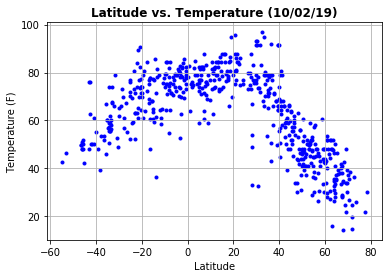

In [180]:
plt.scatter(weather_df['Latitude'], weather_df['Max Temperature (F)'], c = 'blue', marker = '.')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"Latitude vs. Temperature ({today.strftime('%m/%d/%y')})", weight = 'bold')
plt.grid()
plt.savefig("../images/temperature.png")

#### Latitude vs. Humidity Plot

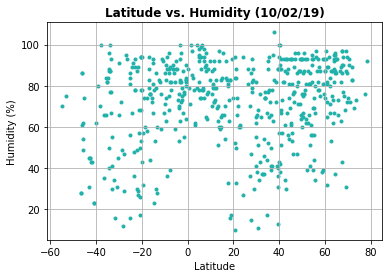

In [179]:
plt.scatter(weather_df['Latitude'], weather_df['Humidity (%)'], c = 'lightseagreen', marker = '.')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude vs. Humidity ({today.strftime('%m/%d/%y')})", weight = 'bold')
plt.grid()
plt.savefig("../images/humidity.png")

#### Latitude vs. Cloudiness Plot

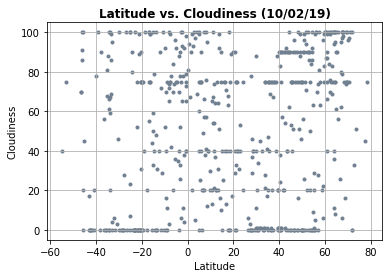

In [178]:
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness'], c = 'slategrey', marker = '.')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Latitude vs. Cloudiness ({today.strftime('%m/%d/%y')})", weight = 'bold')
plt.grid()
plt.savefig("../images/cloudiness.png")

#### Latitude vs. Wind Speed Plot

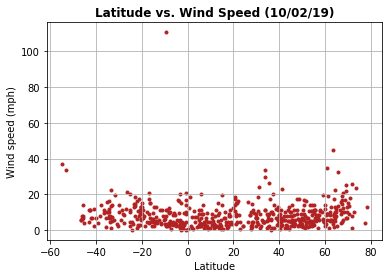

In [177]:
plt.scatter(weather_df['Latitude'], weather_df['Wind speed (mph)'], c = 'firebrick', marker = '.')
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")
plt.title(f"Latitude vs. Wind Speed ({today.strftime('%m/%d/%y')})", weight = 'bold')
plt.grid()
plt.savefig("../images/wind_speed.png")